In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
# data : 1 24 5 2 35 110 5 ... 10000개(9999까지)의 vectorized 된 단어들
# label : 0 부정 1 긍정

In [4]:
max([max(sequence) for sequence in train_data]) 
# 따라서 9999 까지 있음. 10000개의 단어들로 구성된 문장이니

9999

In [5]:
train_data
# data 가 list 형식임 -> tensor 로 바꿔줘야 함.

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [7]:
# Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

In [8]:
train_data.shape

(25000,)

In [9]:
# Vectorize the train data and the test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train.shape

(25000, 10000)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import optimizers

In [15]:
model.compile(optimizer=optimizers.rmsprop_v2.RMSProp(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
from keras import losses
from keras import metrics


In [17]:
model.compile(optimizer = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001), # 최적화기 설정 (경사하강기)
              loss=losses.binary_crossentropy, # 손실함수 지정
              metrics = [metrics.binary_accuracy] # 평가지표 선정
              ) 

In [18]:
# Seperate the validation data (test data set)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

history = model.fit(x=partial_x_train, 
                    y=partial_y_train, 
                    batch_size=512,
                    epochs=20, 
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 51ms/step - loss: 0.5034 - acc: 0.7856 - val_loss: 0.3757 - val_acc: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2911 - acc: 0.9064 - val_loss: 0.2997 - val_acc: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2139 - acc: 0.9312 - val_loss: 0.2780 - val_acc: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1689 - acc: 0.9469 - val_loss: 0.2820 - val_acc: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1371 - acc: 0.9583 - val_loss: 0.2836 - val_acc: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1155 - acc: 0.9633 - val_loss: 0.3048 - val_acc: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0952 - acc: 0.9709 - val_loss: 0.3236 - val_acc: 0.8829
Epoch 8/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0776 - a

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

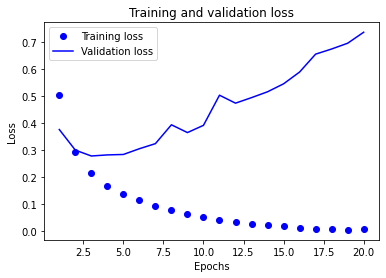

In [21]:
epochs = range(1, len(history_dict['acc'])+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

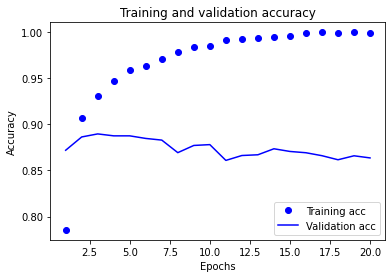

In [22]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4590 - accuracy: 0.8202
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2638 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2018 - accuracy: 0.9290
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2915 - accuracy: 0.8846


In [24]:
results
# accuracy = 0.8827

[0.2915080785751343, 0.8846399784088135]

In [25]:
# Increase the hidden later from two to three

model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model1.fit(x_train, y_train, epochs=4, batch_size = 512)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.4580 - accuracy: 0.8069
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2530 - accuracy: 0.9086
Epoch 3/4
49/49 [==============================] - 2s 30ms/step - loss: 0.1962 - accuracy: 0.9279
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3117 - accuracy: 0.8804


In [26]:
# Increase the number of nodes in the hidden layers

model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model2.fit(x_train, y_train, epochs=4, batch_size = 512)
results2 = model2.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4447 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2375 - accuracy: 0.9126
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1876 - accuracy: 0.9305
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3222 - accuracy: 0.8788


In [27]:
# 

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='tanh', input_shape = (10000,)))
model3.add(layers.Dense(32, activation='tanh'))
model3.add(layers.Dense(32, activation='tanh'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model3.fit(x_train, y_train, epochs=4, batch_size = 512)
results3 = model3.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.3877 - accuracy: 0.8291
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2149 - accuracy: 0.9174
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1746 - accuracy: 0.9358
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3493 - accuracy: 0.8702


In [28]:
print('results1: ',results1)
print('results2: ',results2)
print('results3: ',results3)

results1:  [0.3116886019706726, 0.8804399967193604]
results2:  [0.3221808671951294, 0.8787999749183655]
results3:  [0.34931617975234985, 0.870199978351593]


In [29]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [31]:
print('train_data length: ',len(train_data))
print('test_data length: ',len(test_data))


train_data length:  8982
test_data length:  2246


In [35]:
len(train_data[0])

87

In [36]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [37]:
train_labels[10]
# label 은 0~45 숫자로 되어 있음.

3

In [58]:
# Encoding the data
import numpy as np

# Vectorization
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print('x_train shape: ', x_train.shape)
print('train_data shape: ',train_data.shape)

x_train shape:  (8982, 10000)
train_data shape:  (8982,)


In [41]:
# One Hot encoding
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [42]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [49]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels.shape

(8982, 46)

In [61]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [62]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
model.fit(partial_x_train,
          partial_y_train,
          batch_size = 512,
          epochs = 20,
          validation_data = [x_val, y_val])

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 0.1076 - accuracy: 0.9590 - val_loss: 1.0739 - val_accuracy: 0.8050
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1076 - accuracy: 0.9574 - val_loss: 1.0746 - val_accuracy: 0.8140
Epoch 3/20
16/16 [==============================] - 1s 90ms/step - loss: 0.1067 - accuracy: 0.9579 - val_loss: 1.1648 - val_accuracy: 0.7950
Epoch 4/20
16/16 [==============================] - 1s 62ms/step - loss: 0.1064 - accuracy: 0.9564 - val_loss: 1.1306 - val_accuracy: 0.8110
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.1008 - accuracy: 0.9590 - val_loss: 1.1150 - val_accuracy: 0.8080
Epoch 6/20
16/16 [==============================] - 1s 61ms/step - loss: 0.0963 - accuracy: 0.9607 - val_loss: 1.1404 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.1004 - accuracy: 0.9574 - val_loss: 1.2035 - val_accuracy: 0.7990
Epoch 8/20
16

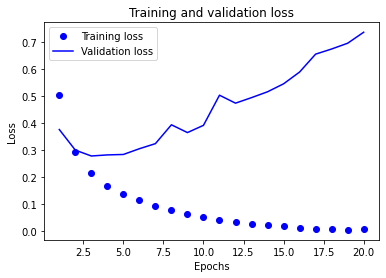

In [68]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

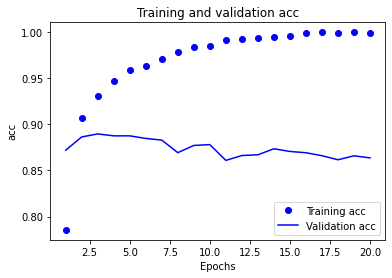

In [69]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [71]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)
# accuracy 0.7769 - 20 epochs results

71/71 [==============================] - 0s 4ms/step - loss: 1.5499 - accuracy: 0.7769
[1.5499396324157715, 0.7769367694854736]


In [ ]:
# Let's run only 9 epochs

In [72]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [73]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [74]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]
model.fit(partial_x_train,
          partial_y_train,
          batch_size = 512,
          epochs = 9,
          validation_data = [x_val, y_val])

Epoch 1/9
16/16 [==============================] - 2s 76ms/step - loss: 2.6027 - accuracy: 0.5536 - val_loss: 1.7144 - val_accuracy: 0.6660
Epoch 2/9
16/16 [==============================] - 1s 62ms/step - loss: 1.3856 - accuracy: 0.7139 - val_loss: 1.2899 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 1s 63ms/step - loss: 1.0134 - accuracy: 0.7859 - val_loss: 1.0965 - val_accuracy: 0.7610
Epoch 4/9
16/16 [==============================] - 1s 61ms/step - loss: 0.7948 - accuracy: 0.8335 - val_loss: 1.0008 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6329 - accuracy: 0.8654 - val_loss: 0.9342 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 49ms/step - loss: 0.5043 - accuracy: 0.8938 - val_loss: 0.8906 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4086 - accuracy: 0.9129 - val_loss: 0.8846 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [75]:
# 9 epochs results
results = model.evaluate(x_test, one_hot_test_labels)
print(results) # acc 0.7841 - accuracy improved

71/71 [==============================] - 0s 3ms/step - loss: 0.9633 - accuracy: 0.7841
[0.963309645652771, 0.784060537815094]


In [76]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
random_acc = float(np.sum(hits_array))/len(test_labels)
print(random_acc) # random 하게 추측할 때 정확도 - 0.1892

0.1892252894033838


In [77]:
# Encoding 의 다른 방법 (원핫인코딩 말고)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])
# loss function 만 sparse_categorical_crossentropy 로 바꿔주기만 하면 됨.


In [78]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [80]:
print('train data shape: ',train_data.shape)
print('test data shape: ',test_data.shape)

train data shape:  (404, 13)
test data shape:  (102, 13)


In [84]:
train_targets
# target : median values of owner-occupied homes

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [85]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [86]:
test_data -= mean
test_data /= std

In [87]:
from keras import models
from keras import layers

# Regression model 만들기 
# Regression 특징 : output이 1개이고 활성화함수가 없음.
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model


In [96]:
# Validation Data 가 결과에 영향을 준다!
# 그래서 K-Fold 를 통해 validation 데이터 분리의 영향을 줄인다.

import numpy as np

k=4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
       [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis=0
       )
  partial_train_targets = np.concatenate(
       [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
       )
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, 
            epochs = num_epochs, batch_size = 1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [97]:
all_scores

[1.8647935390472412, 3.0632638931274414, 2.716806650161743, 2.951464891433716]

In [98]:
np.mean(all_scores)

2.6490822434425354

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
  val_targets = test_labels[i*num_val_samples : (i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0
  )

  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis=0
  )

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      verbose=0, validation_data = (val_data, val_targets),
                      epochs = num_epochs, batch_size = 1)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1


In [ ]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

In [ ]:
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

In [ ]:
# 따라서 Regression 에선 "accuracy"가 안쓰이고 "MSE" 또는 "MAE"가 쓰인다.
# 인풋값이 위 아래로 왔다갔다한다면 전처리 과정에서 스케일링을 해줄 필요가 있다.
# 만약 데이터가 적다면 K-fold validation을 통해서 데이터 분리로 인한 불완전성을 해결해줄 수 있다.
# 만약 훈련 데이터가 거의 없다면 작은 신경망과 작은 은닉층으로 훈련을 하는게 좋다. 
# 그 이유는 이렇게 해야만 과대적합을 방지할 수 있기 때문이다.

In [ ]:
# 은닉층을 너무 작게 하면 Bottleneck 현상이 발현된다.
# 회귀는 분류와 다른 loss function 이 사용된다